# Galactic Lensing of Maps

Deflection lenses can also be applied to already existing healpy maps. To see how to create such a map from CRPropa output data look at 'lensing_cr'-examples in this folder.

In [6]:
%matplotlib inline

import crpropa
import healpy
import matplotlib.pyplot as plt
import numpy as np
import copy

lens = crpropa.MagneticLens('pathto/lens.cfg')

/home/home1/mertelx/anaconda/lib/python2.7/site-packages/healpy/sphtfunc.py:296: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


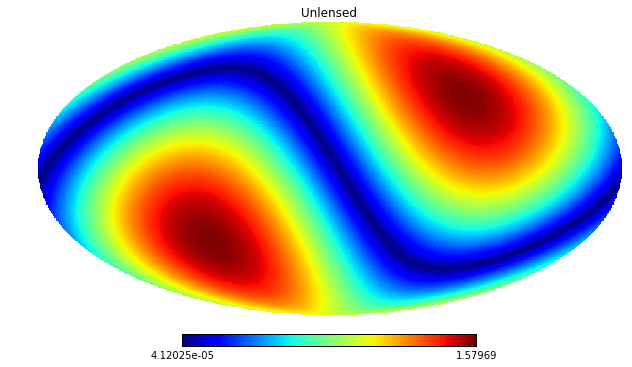

In [2]:
# generate random input map
# including a monopol and a dipol
l = [1,1,0,0]
inputMap = abs(healpy.synfast(l, nside=64))

#plot map
healpy.mollview(map=inputMap, title='Unlensed')
plt.savefig('random_unlensed_map.png')

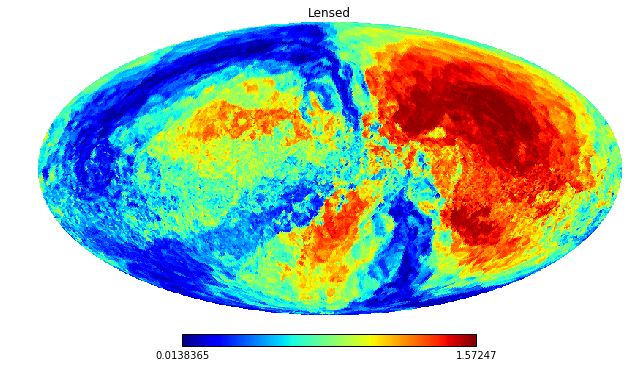

In [3]:
#copy input data as we need it later
outputMap = copy.copy(inputMap)

#transform map using a rigidity of 5 EV
lens.transformModelVector(outputMap, 5 * crpropa.EeV)

#plot transformed map
healpy.mollview(map=outputMap, title='Lensed')
plt.savefig('random_lensed_map.png')

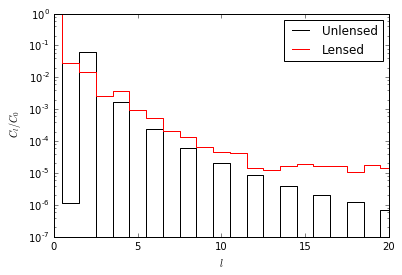

In [7]:
#Calculate power spectra
lmax = 20
mmUnlensed = healpy.anafast(inputMap, lmax=lmax)
mmLensed = healpy.anafast(outputMap, lmax=lmax)

#plot power spectra
plt.figure()
l = np.arange(0, 20.01)
plt.step(l, mmUnlensed / mmUnlensed[0], c='k', label='Unlensed', where='mid')
plt.step(l, mmLensed / mmLensed[0], c='r', label='Lensed', where='mid')
plt.semilogy()
plt.ylim(1E-7,1)
plt.xlabel('$l$')
plt.ylabel(' $C_l / C_0$')
plt.legend()
plt.show()
plt.savefig('random_power_spectra.png')